**Vorabversion**

# Auswirkungen des Klimawandel in Südwestfalen 
## am Beispiel der Grünlandtemperatursumme 

Die verwendeten Rohdaten sind über das [Open Data](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/) Portal des [DWD](http://dwd.de) verfügbar.

**Disclaimer:** 
*Für diese Auswertung werden die Messdaten einzelner Wetterstation herangezogen. Es kann nicht ausgeschlossen werden, dass es durch Standort bedingte Einflüße zu Verzehrungen kommt.*

Der Klimawandel ist seit langer Zeit ein Thema. Anhand von Wetteraufzeigungen der vom DWD betriebenen Wetterstation soll gezeigt werden, welche Auswirkung in Südwestfalen nachweisbar sind. 
Um die Anschaulichkeit zu verbessern und nicht auf pure Statistik zu setzen, wird für die Auswertung die Grünlandtemperatursumme verwendet. Es ist ein errechneter Temperaturwert der in der Agrarmeterologie verwandt wird.

Zunächst einmal gilt es, die Arbeitsumgebung vorzubereiten. 

## Auf geht es!

**Laden der notwendigen Programmpaket**

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

 Activating environment at `~/Code/Julia/weathereffect/Project.toml`


In [2]:
# This cell only has to be executed once to install all the necessary packages

Pkg.add([
    "Statistics",
    "Dates",
    "CSV",
    "DataFrames",
    "Query",
    "Pipe",
    "StatsPlots",
    ])

   Updating registry at `~/.julia/registries/General`
######################################################################### 100,0%
  Resolving package versions...
No Changes to `~/Code/Julia/weathereffect/Project.toml`
No Changes to `~/Code/Julia/weathereffect/Manifest.toml`


In [3]:
using CSV, DataFrames, Statistics, Pipe, StatsPlots, Query, Dates

**Laden der Rohdaten**

In [4]:
suedwest_weather = CSV.File("./data/dwd_hist_weather.csv") |> DataFrame;
first(suedwest_weather, 10)

,Station_ID,Date,Rainfall,Snow,Temp_Avg,Temp_Max,Temp_Min,Year
,Int64,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2483,1955-01-01,3.1,12.0,-5.9,-4.4,-6.7,1955
2,2483,1955-01-02,4.0,15.0,-8.4,-6.7,-9.3,1955
3,2483,1955-01-03,0.3,19.0,-8.4,-7.5,-8.7,1955
4,2483,1955-01-04,0.0,19.0,-9.5,-8.6,-10.0,1955
5,2483,1955-01-05,0.0,19.0,-7.8,-4.6,-10.4,1955
6,2483,1955-01-06,0.3,16.0,-7.0,-4.2,-8.6,1955
7,2483,1955-01-07,0.0,15.0,-9.0,-8.0,-9.9,1955
8,2483,1955-01-08,0.0,14.0,-10.3,-6.3,-11.5,1955
9,2483,1955-01-09,0.0,12.0,-8.3,-7.0,-10.3,1955


### Die Grünlandtemperatursumme
Die Grünlandtemperatursumme ist ein errechneter Temperaturwert der in der Agrarmeterologie verwandt wird.

##### Hintergrund
Ab einem Summenwert von 200°C ist die Vegatationruhe des Winters beendet und das Pflanzenwachstum startet. Die Böden haben sich soweit erwärmt, dass sie Nährstoffe bereitstellen können. Kurz gesagt, es kann als faktischer "Frühjahresbeginn" gewertet werden. 

Um die Grünlandtemperatursumme zu errechnen, werden alle positiven Tagesmittelwerte addiert. 
* Im Januar wird die Summe mit 0,5 multipliziert
* Im Februar wird die Summe mit 0,75 multipliziert
* Ab März gilt die errechnete Temperatursumme ohne Abschlag

##### Die Wetterstationen und die Zeiträume für die Messwerte verfügbar sind

| Station | Kreis | Zeitraum | Stationshöhe |
| :-----: | :----: | :-----:  |----:|
| Kahler Asten | Hochsauerlandkreis   | 1955 bis 2019 | 839 m |
| Lüdenscheid | Märkische Kreis | 1950 bis 1995 | 444 m |
| Lüdenscheid | Märkische Kreis | 1994 bis 2019 | 386 m |
| Bad Sassendorf | Kreis Soest | 1950 bis 1980 | 81 m |
| Lippstadt | Kreis Soest | 1981 bis 2019 | 92 m |
| Lennestadt | Kreis Olpe | 1962 bis 2019 | 286 m|

Leider liegen nicht für alle Wetterstationen Daten für den Zeitraum 1950 bis 2020 vor. Starke beschädigungen durch den zweiten Weltkrieg machten die Wettermessung am Kahlen Aster erst 1955 wieder möglich. Für Lennestadt beginnt die Messreihe erst 1962. Die Wetterstationen Lüdenscheid und im Kreis Soest wechselten in den betrachteten Zeitraum den Standort. 



**Selektion der Daten**

In [5]:
gtsdata = suedwest_weather |> @query(i, begin
            @where i.Year >= 1950 && i.Month <= 5 && i.Temp_Avg >= 0.0 && i.Station_ID != 1300
            @select {i.Station_ID, i.Date, i.Month, i.Year, i.Temp_Avg}
    end) |> DataFrame

first(gtsdata, 10)

,Station_ID,Date,Month,Year,Temp_Avg
,Int64,Date,Int64,Int64,Float64
1,2483,1955-01-16,1,1955,3.2
2,2483,1955-01-22,1,1955,0.7
3,2483,1955-01-24,1,1955,3.4
4,2483,1955-01-25,1,1955,2.4
5,2483,1955-01-27,1,1955,3.2
6,2483,1955-01-28,1,1955,6.3
7,2483,1955-01-29,1,1955,4.6
8,2483,1955-01-30,1,1955,2.1
9,2483,1955-01-31,1,1955,2.8


**Erstellen eines leeren Dataframes um die errechneten Werte abspeichern zu können**

In [6]:
gtsdf = DataFrame(Station_ID = Int64[], Year = Int64[], Day = Int64[], Date = Date[], Gts_Temp = Float64[])

,Station_ID,Year,Day,Date,Gts_Temp
,Int64,Int64,Int64,Date,Float64


**Errechnung der Temperatursummen für alle Stationen**

In [7]:
stationen = unique(gtsdata.Station_ID);
countStationen = size(stationen);

for s in 1:8
    gtsYearRange = gtsdata |> @query(i, begin
            @where i.Station_ID == stationen[s]
            @select {i.Year}
    end) |> DataFrame

    gtsYearRangeMin = minimum(gtsYearRange.Year)
    gtsYearRangeMax = maximum(gtsYearRange.Year)

    iyearRange = gtsYearRangeMin:gtsYearRangeMax
    
   
    
    for iyear in iyearRange
        gtsJanDf = gtsdata |> @query(i, begin
            @where i.Year == iyear && i.Month == 1 && i.Station_ID == stationen[s]
            @select {i.Date, i.Temp_Avg}
        end) |> DataFrame
    
        gtsJan = sum(gtsJanDf.Temp_Avg) * 0.5
    
        gtsFebDf = gtsdata |> @query(i, begin
            @where i.Year == iyear && i.Month == 2 && i.Station_ID == stationen[s]
            @select {i.Date, i.Temp_Avg}
        end) |> DataFrame       
    
        gtsFeb = sum(gtsFebDf.Temp_Avg) * 0.75
    
        gtsMarDf = gtsdata |> @query(i, begin
            @where i.Year == iyear && i.Month > 2 && i.Station_ID == stationen[s]
            @select {i.Date, i.Temp_Avg}
        end) |> DataFrame
    
        daycounter = 1
        gts = round((gtsJan + gtsFeb), digits=2)
        
        while gts <= 200
           gts = gts + gtsMarDf.Temp_Avg[daycounter]
           daycounter = daycounter + 1
        end
    
        gtsdate = gtsMarDf[daycounter, :]
        gtsday = dayofyear(gtsdate.Date)
        push!(gtsdf, [stationen[s], iyear, gtsday, gtsdate.Date, gts])
    
    end
end


**Die errechneten Temperatursummen**

Blick auf die erst 15 Zeilen des Datensatzes

In [8]:
first(gtsdf, 15)

,Station_ID,Year,Day,Date,Gts_Temp
,Int64,Int64,Int64,Date,Float64
1,2483,1955,127,1955-05-07,206.55
2,2483,1956,130,1956-05-09,200.85
3,2483,1957,105,1957-04-15,202.7
4,2483,1958,130,1958-05-10,203.35
5,2483,1959,104,1959-04-14,209.65
6,2483,1960,111,1960-04-20,202.22
7,2483,1961,97,1961-04-07,208.45
8,2483,1962,131,1962-05-11,203.8
9,2483,1963,126,1963-05-06,202.1


In [9]:
println("Der Datensatz umfasst insgesamt ",size(gtsdf)[1], " Zeilen" )

Der Datensatz umfasst insgesamt 311 Zeilen


**Separieren der Stationen für einen Plot**

In [10]:
lued = gtsdf |> @query(i, begin
            @where i.Station_ID == 3096 || i.Station_ID == 3098
            @select {i.Year, i.Day, i.Date, i.Gts_Temp}
    end) |> DataFrame;
  

In [11]:
soest = gtsdf |> @query(i, begin
            @where i.Station_ID == 4401 || i.Station_ID == 3031
            @select {i.Year, i.Day, i.Date, i.Gts_Temp}
    end) |> DataFrame; 

In [12]:
hsk = gtsdf |> @query(i, begin
            @where i.Station_ID == 2483
            @select {i.Year, i.Day, i.Date, i.Gts_Temp}
    end) |> DataFrame;

In [13]:
olpe = gtsdf |> @query(i, begin
            @where i.Station_ID == 2947
            @select {i.Year, i.Day, i.Date, i.Gts_Temp}
    end) |> DataFrame;  

In [14]:
mk = scatter(lued.Year, lued.Day, reg = :true, title = "Lüdenscheid / Märkischer Kreis");
so = scatter(soest.Year, soest.Day, reg = :true, title = "Bad Sassendorf / Lippstadt Kreis Soest");
hskpl = scatter(hsk.Year, hsk.Day, reg = :true, title = "Kahler Asten HSK");
olpepl = scatter(olpe.Year, olpe.Day, reg = :true, title = "Lennestadt Kreis Olpe");

#### Chart 1

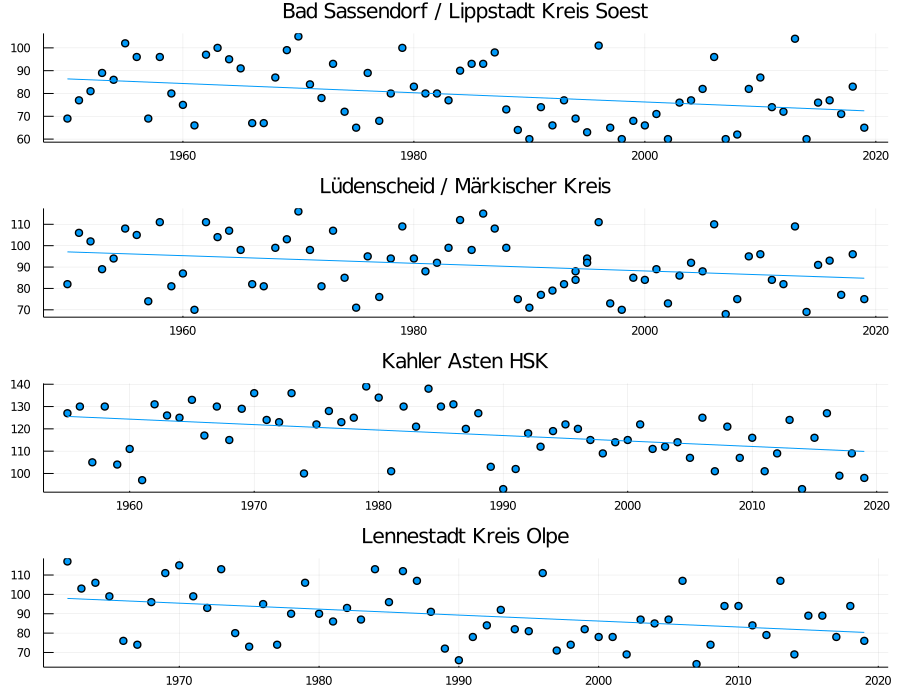

In [15]:
plot(so, mk, hskpl, olpepl, layout = (4, 1), legend = false, size = (900, 700))

#### Berrechnung Klimamittel

**Station Lüdenscheid**

In [16]:
lued_klimit_1 = filter(:Year => <(1981), lued)
lued_klimit_1 = lued_klimit_1[2:end, :]
klimit_1 = combine(lued_klimit_1, :Day => mean)
lued_klimit_2 = filter(:Year => >(1990), lued)
klimit_2 =combine(lued_klimit_2, :Day => mean)
println("Klimamittel 1951 - 1980: ", klimit_1.Day_mean[1], " Tage")
println("Max: ", maximum(lued_klimit_1.Day), " Tage")
println("Min: ", minimum(lued_klimit_1.Day), " Tage")
println("Spanne: ", maximum(lued_klimit_1.Day) - minimum(lued_klimit_1.Day), " Tage")
println("Klimamittel 1991 - 2020: ", klimit_2.Day_mean[1], " Tage")
println("Max: ", maximum(lued_klimit_2.Day), " Tage")
println("Min: ", minimum(lued_klimit_2.Day), " Tage")
println("Spanne: ", maximum(lued_klimit_2.Day) - minimum(lued_klimit_2.Day), " Tage")
filter(:Year => >(2015), lued)

Klimamittel 1951 - 1980: 94.6 Tage
Max: 116 Tage
Min: 70 Tage
Spanne: 46 Tage
Klimamittel 1991 - 2020: 86.03225806451613 Tage
Max: 111 Tage
Min: 68 Tage
Spanne: 43 Tage


,Year,Day,Date,Gts_Temp
,Int64,Int64,Date,Float64
1,2016,93,2016-04-02,202.75
2,2017,77,2017-03-18,201.32
3,2018,96,2018-04-06,203.15
4,2019,75,2019-03-16,205.95


**Station Kreis Soest**

In [17]:
soest_klimit_3 = filter(:Year => <(1981), soest)
soest_klimit_3 = soest_klimit_3[2:end, :]
klimit_3 = combine(soest_klimit_3, :Day => mean)
soest_klimit_4 = filter(:Year => >(1990), soest)
klimit_4 = combine(soest_klimit_4, :Day => mean)
println("Klimamittel 1951 - 1980: ", klimit_3.Day_mean[1], " Tage")
println("Max: ",maximum(soest_klimit_3.Day), " Tage")
println("Min: ",minimum(soest_klimit_3.Day), " Tage")
println("Spanne: ", maximum(soest_klimit_3.Day) - minimum(soest_klimit_3.Day), " Tage")
println("Klimamittel 1991 - 2020: ", klimit_4.Day_mean[1], " Tage")
println("Max: ",maximum(soest_klimit_4.Day), " Tage")
println("Min: ",minimum(soest_klimit_4.Day), " Tage")
println("Spanne: ", maximum(soest_klimit_4.Day) - minimum(soest_klimit_4.Day), " Tage")
filter(:Year => >(2015), soest)

Klimamittel 1951 - 1980: 84.56666666666666 Tage
Max: 105 Tage
Min: 65 Tage
Spanne: 40 Tage
Klimamittel 1991 - 2020: 73.93103448275862 Tage
Max: 104 Tage
Min: 60 Tage
Spanne: 44 Tage


,Year,Day,Date,Gts_Temp
,Int64,Int64,Date,Float64
1,2016,77,2016-03-17,202.98
2,2017,71,2017-03-12,204.17
3,2018,83,2018-03-24,201.0
4,2019,65,2019-03-06,205.75


**Station Kahler Asten**

In [18]:
hsk_klimit_5 = filter(:Year => <(1985), hsk)
klimit_5 = combine(hsk_klimit_5, :Day => mean)
hsk_klimit_6 = filter(:Year => >(1990), hsk)
klimit_6 = combine(hsk_klimit_6, :Day => mean)

println("Klimamittel 1955 - 1984: ", klimit_5.Day_mean[1], " Tage")
println("Max: ",maximum(hsk_klimit_5.Day), " Tage")
println("Min: ",minimum(hsk_klimit_5.Day), " Tage")
println("Spanne: ", maximum(hsk_klimit_5.Day) - minimum(hsk_klimit_5.Day), " Tage")
println("Klimamittel 1991 - 2020: ", klimit_6.Day_mean[1], " Tage")
println("Max: ",maximum(hsk_klimit_6.Day), " Tage")
println("Min: ",minimum(hsk_klimit_6.Day), " Tage")
println("Spanne: ", maximum(hsk_klimit_6.Day) - minimum(hsk_klimit_6.Day), " Tage")
filter(:Year => >(2015), hsk)

Klimamittel 1955 - 1984: 123.0 Tage
Max: 139 Tage
Min: 97 Tage
Spanne: 42 Tage
Klimamittel 1991 - 2020: 112.34482758620689 Tage
Max: 127 Tage
Min: 93 Tage
Spanne: 34 Tage


,Year,Day,Date,Gts_Temp
,Int64,Int64,Date,Float64
1,2016,127,2016-05-06,204.4
2,2017,99,2017-04-09,203.1
3,2018,109,2018-04-19,214.05
4,2019,98,2019-04-08,200.05


**Station Lennestadt Kreis Olpe**

In [19]:
olpe_klimit_7 = filter(:Year => <(1992), olpe)
klimit_7 = combine(olpe_klimit_7, :Day => mean)


println("Klimamittel 1962 - 1991: ", klimit_7.Day_mean[1], " Tage")
println("Max: ",maximum(olpe_klimit_7.Day), " Tage")
println("Min: ",minimum(olpe_klimit_7.Day), " Tage")
println("Spanne: ", maximum(olpe_klimit_7.Day) - minimum(olpe_klimit_7.Day), " Tage")
filter(:Year => >(2015), olpe)

Klimamittel 1962 - 1991: 93.7 Tage
Max: 117 Tage
Min: 66 Tage
Spanne: 51 Tage


,Year,Day,Date,Gts_Temp
,Int64,Int64,Date,Float64
1,2016,89,2016-03-29,206.63
2,2017,78,2017-03-19,200.65
3,2018,94,2018-04-04,207.9
4,2019,76,2019-03-17,204.82


### Was wurde gemacht?

Die Temperatursumme wurden gemäß der Formel berechnet. Wird der Schwellwert von 200°C überschritten wird das Datum ausgelesen und der Tag des Jahres ermittelt. Es handelt sich um einen fortlaufende Zählung. Der 1. Januar ist Tag 1 der 2. Januar Tag 2 der 31. Dezember Tag 365/366. 
Auf der x-Achse ist die Zeit dargestellt, auf der y-Achse der Tag an dem die Wärmesumme erreicht wird.

Zur Orientierung:
* der 1. März ist Tag 59
* der 1. April ist Tag 90

In einem zweiten Schritte wurden die Klimamittel errechnet. Einmal für den Zeitraum von 1951 bis 1980, und von 1991 bis 2020.
Aus den schon erwähnten Gründen, weicht die Referenzperiode am Kahlen Asten ab. Bei der Station Lennestadt ist die Messreihe zu kurz um zwei Klimamittel errechnen zu können.  

### Was ist zu sehen?
* Die Temperatursummen werden früher im Jahr erreicht.   
* An allen Station ist eine Streuung von etwa 40 Tagen zwischen dem Minimalen und Maximalen Wert zu beobachen. Diese Streuung ist auch über den gesamten Zeitraum weitgehend konstant. Dies bestätigen auch die Minimum- und Maximumwerte die jeweils zu den Klimamittel ausgegeben wurden.
* Im Vergleich der Klimamittel ist die Temperatursumme heute rund 11 Tage füher erreicht, als es in der Refenrenzperiode der Fall war.
* Das es am Standort Lüdenscheid abweichungen gibt (8 Tage) kann am Ort der Messtation liegen. Die Wetterstation befand sich zu diesem Zeitpunkt (1951 bis 1980) am Geschwister-Scholl-Gymnasium, mitten in der Stadt Lüdenscheid. Seit 1994 befindet sich die Station in Lüdenscheid-Oberhunscheid.
* Von 1989 bis etwa 2004 ist eine Häufung von milden Jahre zu beobachen. Die Station Kahler Asten pendelt hier um die Trendlinie. Die Stationen Soest, Lennestadt und Lüdenscheid sind unter dem Trend. Das Jahr 1996 ist hier als Aussreißerwert klar zu erkennen. In den Jahren bis 2020 nimmt die Streuung wieder zu. Da dieses Muster an allen Stationen in Südwestfalen zu beobacheten ist, können kleinräumige Wettereffekte ausgeschlossen werden. Ein möglicher Grund für dieses Muster sind beeinflußungen durch [El Niño](https://de.wikipedia.org/wiki/El_Ni%C3%B1o-Southern_Oscillation). Ein im Südpazifik auftretendes Wettermuster. 


### Wird sich der Trend Fortsetzen?
Ja und Nein. Zum einen wird sich der in den letzten Jahren etablierte Trend zu milden Wintern und einen frühen Frühjahr, im Rahmen der nartürlichen Fluktuation, fortsetzen. Auf der andern Seite zeigen die Charts auch eine "Bodenbildung". Im Kreis Soest ist das bei 60 Tagen, etwa dem 1.März, in Lüdenscheid um den 10. März, zu beobachen. Für den Beginn des Pflanzenwachtums ist nicht nur die Temperatur, sonder auch die Tageslänge entscheidend. Die Tagelänge wiederum ist von der Erdrotation abhängig und nicht von Klima. 